TESTING

In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

df_unesco = pd.read_csv("unesco.csv")
df_unesco.set_index(["Country", "Year"], inplace=True)

df_unesco_w_preds = pd.read_csv("unesco_with_predictions.csv")
df_unesco_w_preds.set_index(["Country", "Year"], inplace=True)

df_unesco_train = pd.read_csv("unesco_train.csv")
df_unesco_train.set_index(["Country", "Year"], inplace=True)
df_unesco_train = df_unesco_train[df_unesco_train["pop14under"] > 0]
df_unesco_train = df_unesco_train.dropna()

In [94]:
# plots country happiness
def plot_country_happiness(country):
    df_country = df_unesco_w_preds.loc[country]
    hapScores = df_country["happinessScore"].sort_index()
    display(hapScores.plot.line())

rf = RandomForestRegressor(n_estimators=100, max_features="sqrt")
ytrain = df_unesco_train["happinessScore"]

def get_usable_features(country):
    usable_features = []
    df_country = df_unesco.loc[country]
    for col in df_country:
        missing_values = len(df_country[df_country[col] <= 0])
        if missing_values < 5:
            usable_features.append(col)
    return usable_features

# plots country happiness taking missing values into account
def plot_country_happiness2(country):
    usable_features = get_usable_features(country)
    Xtrain = df_unesco_train[usable_features]

    Xtest = df_unesco.loc[country][usable_features]
    rf.fit(Xtrain, ytrain)
    ypreds = rf.predict(Xtest)
    country_preds = pd.DataFrame({"Year": Xtest.index, "happinessScore": ypreds})
    display(country_preds.set_index("Year").plot.line())

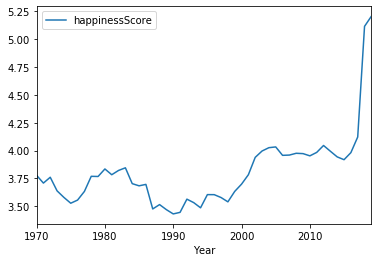

In [95]:
plot_country_happiness2("Cambodia")

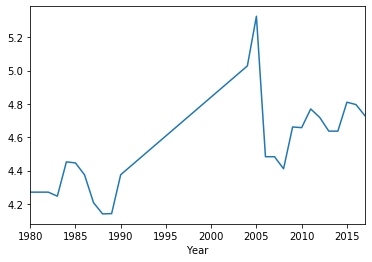

In [96]:
plot_country_happiness("Iraq")

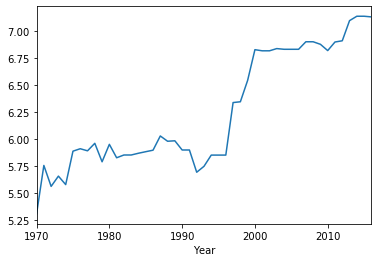

In [97]:
plot_country_happiness("United States")

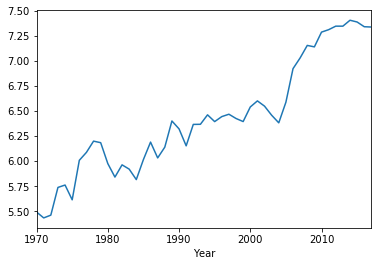

In [99]:
plot_country_happiness("Canada")

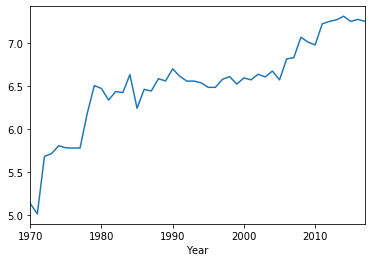

In [100]:
plot_country_happiness("Australia")

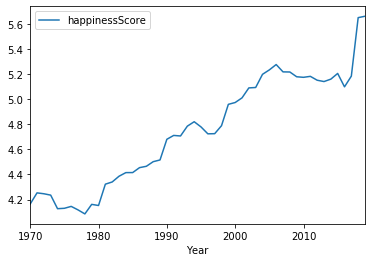

In [105]:
plot_country_happiness2("Vietnam")

In [ ]:
df_unesco_w_preds.loc["Vietnam"]